In [15]:
#import utils.fetcher_utils as fetcher
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Load data from CSV into a DataFrame
imdb_df = pd.read_csv('../resources/movie_metadata.csv')
#imdb_df.head()
#print(imdb_df.columns)

for column in imdb_df.columns:
    print(column)


color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [18]:
# Remove specific columns
columns_to_remove = ['aspect_ratio', 'movie_facebook_likes', 'movie_imdb_link', 'facenumber_in_poster']
imdb_df = imdb_df.drop(columns=columns_to_remove)
imdb_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1


In [19]:
imdb_df.info()
imdb_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,377.982886,2.061149e+08,12.474599,4042.438863,1.125116
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000


In [20]:
# Create a data frame with numeric columns
imdb_df_numeric = imdb_df.select_dtypes(include='number')

# Find correlation between numeric columns with imdb_score
correlation = imdb_df_numeric.corr()['imdb_score'].sort_values(ascending=False)
correlation

imdb_score                   1.000000
num_voted_users              0.410965
num_critic_for_reviews       0.305303
num_user_for_reviews         0.292475
duration                     0.261662
gross                        0.198021
director_facebook_likes      0.170802
cast_total_facebook_likes    0.085787
actor_2_facebook_likes       0.083808
actor_1_facebook_likes       0.076099
actor_3_facebook_likes       0.052633
budget                       0.030688
title_year                  -0.209167
Name: imdb_score, dtype: float64

In [36]:
# Check for missing values
missing_values = imdb_df_numeric.isnull().sum().sort_values(ascending=False)
missing_values

gross                        884
budget                       492
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
actor_2_facebook_likes        13
actor_1_facebook_likes         7
num_voted_users                0
cast_total_facebook_likes      0
imdb_score                     0
dtype: int64

In [30]:
# Define the columns for which you want to remove null values
columns_to_clean = ['color', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
                    'actor_3_facebook_likes', 'actor_1_facebook_likes', 'plot_keywords', 
                    'language', 'content_rating', 'actor_2_facebook_likes']

# Remove rows where any of these columns have null values
imdb_df = imdb_df.dropna(subset=columns_to_clean)

# Reset the index after dropping rows
imdb_df_clean = imdb_df.reset_index(drop=True)

# Display the new shape of the DataFrame
print(f"DataFrame shape after removing additional nulls: {imdb_df.shape}")

# Check for missing values in the cleaned DataFrame
print(imdb_df.isnull().sum().sort_values(ascending=False))

DataFrame shape after removing additional nulls: (4566, 24)
gross                        516
budget                       313
color                          0
cast_total_facebook_likes      0
actor_2_facebook_likes         0
title_year                     0
content_rating                 0
country                        0
language                       0
num_user_for_reviews           0
plot_keywords                  0
actor_3_name                   0
num_voted_users                0
director_name                  0
movie_title                    0
actor_1_name                   0
genres                         0
actor_1_facebook_likes         0
actor_2_name                   0
actor_3_facebook_likes         0
director_facebook_likes        0
duration                       0
num_critic_for_reviews         0
imdb_score                     0
dtype: int64


In [31]:
imdb_df.info()
imdb_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4566 entries, 0 to 5042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4566 non-null   object 
 1   director_name              4566 non-null   object 
 2   num_critic_for_reviews     4566 non-null   float64
 3   duration                   4566 non-null   float64
 4   director_facebook_likes    4566 non-null   float64
 5   actor_3_facebook_likes     4566 non-null   float64
 6   actor_2_name               4566 non-null   object 
 7   actor_1_facebook_likes     4566 non-null   float64
 8   gross                      4050 non-null   float64
 9   genres                     4566 non-null   object 
 10  actor_1_name               4566 non-null   object 
 11  movie_title                4566 non-null   object 
 12  num_voted_users            4566 non-null   int64  
 13  cast_total_facebook_likes  4566 non-null   int64  
 1

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score
count,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4.050000e+03,4.566000e+03,4566.000000,4566.000000,4.253000e+03,4566.000000,4566.000000,4566.000000
mean,150.999781,108.925756,733.185502,687.187911,6975.234560,4.969566e+07,9.140798e+04,10344.738721,295.942619,4.184517e+07,2001.989926,1778.633596,6.434450
std,121.198460,22.294896,2905.861627,1738.357883,14692.014175,6.892937e+07,1.431113e+05,18036.102063,388.117952,2.127997e+08,12.366151,4206.407970,1.097075
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.620000e+02,2.800000e+01,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000
25%,62.000000,94.000000,9.000000,159.000000,665.750000,6.166026e+06,1.256325e+04,1608.500000,84.000000,7.840000e+06,1999.000000,324.250000,5.800000
50%,121.000000,105.000000,54.000000,394.000000,1000.000000,2.661679e+07,4.128050e+04,3389.000000,177.000000,2.000000e+07,2005.000000,631.000000,6.600000
75%,207.000000,119.000000,213.000000,651.750000,12000.000000,6.388958e+07,1.063672e+05,14809.500000,351.000000,4.600000e+07,2010.000000,940.000000,7.200000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000


In [39]:
# Drop rows where either 'gross' or 'budget' is null
imdb_df_clean = imdb_df.dropna(subset=['gross', 'budget'])

# Reset the index after dropping rows
imdb_df_clean = imdb_df_clean.reset_index(drop=True)

# Display the new shape of the DataFrame
print(f"Original DataFrame shape: {imdb_df.shape}")
print(f"Cleaned DataFrame shape: {imdb_df_clean.shape}")
missing_values_clean = imdb_df_clean.isnull().sum().sort_values(ascending=False)

Original DataFrame shape: (4566, 24)
Cleaned DataFrame shape: (3808, 24)


 Replacing null values with a placeholder.

In [41]:
# Define a placeholder for missing values
PLACEHOLDER = 'Unknown'

# Replace NaN with the placeholder for actor name columns
for col in ['actor_1_name', 'actor_2_name', 'actor_3_name']:
    imdb_df_clean[col] = imdb_df_clean[col].fillna(PLACEHOLDER)

# Verify the changes
print(imdb_df_clean[['actor_1_name', 'actor_2_name', 'actor_3_name']].head(10))  


      actor_1_name       actor_2_name          actor_3_name
0      CCH Pounder   Joel David Moore             Wes Studi
1      Johnny Depp      Orlando Bloom        Jack Davenport
2  Christoph Waltz       Rory Kinnear      Stephanie Sigman
3        Tom Hardy     Christian Bale  Joseph Gordon-Levitt
4          Unknown            Unknown               Unknown
5     Daryl Sabara    Samantha Morton          Polly Walker
6     J.K. Simmons       James Franco         Kirsten Dunst
7     Brad Garrett       Donna Murphy           M.C. Gainey
8  Chris Hemsworth  Robert Downey Jr.    Scarlett Johansson
9     Alan Rickman   Daniel Radcliffe          Rupert Grint


Preserve the original names for identification and further analysis.

In [43]:
# Store original actor names in new columns
imdb_df_clean['original_actor_1_name'] = imdb_df_clean['actor_1_name']
imdb_df_clean['original_actor_2_name'] = imdb_df_clean['actor_2_name']
imdb_df_clean['original_actor_3_name'] = imdb_df_clean['actor_3_name']
imdb_df_clean['original_director_name'] = imdb_df_clean['director_name']
#imdb_df.head()
print(imdb_df_clean[['original_actor_1_name', 'original_actor_2_name', 'original_actor_3_name', 'original_director_name']].head())

  original_actor_1_name original_actor_2_name original_actor_3_name  \
0           CCH Pounder      Joel David Moore             Wes Studi   
1           Johnny Depp         Orlando Bloom        Jack Davenport   
2       Christoph Waltz          Rory Kinnear      Stephanie Sigman   
3             Tom Hardy        Christian Bale  Joseph Gordon-Levitt   
4               Unknown               Unknown               Unknown   

  original_director_name  
0          James Cameron  
1         Gore Verbinski  
2             Sam Mendes  
3      Christopher Nolan  
4         Andrew Stanton  


Target Encoding (map these mean scores back to the respective actor columns in the original DataFrame).
The encoded actor columns can now serve as features, where the actor names are replaced by their corresponding mean IMDb score.

In [44]:
# Preprocess names
columns_to_preprocess = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']
for col in columns_to_preprocess:
    imdb_df_clean[col] = imdb_df_clean[col].astype(str).str.strip().str.lower()

# Create Actor and Director Mean Mapping
melted_df = imdb_df_clean.melt(
    id_vars=['imdb_score'], 
    value_vars=columns_to_preprocess, 
    value_name='act_dir'
)
melted_df['act_dir'] = melted_df['act_dir'].astype(str).str.strip().str.lower()
person_mean_mapping = melted_df.groupby('act_dir')['imdb_score'].mean()

# Apply Target Encoding
for col in columns_to_preprocess:
    imdb_df_clean[col] = imdb_df_clean[col].map(person_mean_mapping).fillna(imdb_df_clean['imdb_score'].mean())

# Example: Get mean IMDb score for a specific actor
tom_cruise_score = person_mean_mapping.get('tom cruise', None)
print(f"Mean IMDb Score for Tom Cruise: {tom_cruise_score}")

# Verify the DataFrame
print(imdb_df_clean[['original_actor_1_name', 'original_actor_2_name', 'original_actor_3_name', 'original_director_name', 
               'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']].head())

Mean IMDb Score for Tom Cruise: 6.428571428571429
  original_actor_1_name original_actor_2_name original_actor_3_name  \
0           CCH Pounder      Joel David Moore             Wes Studi   
1           Johnny Depp         Orlando Bloom        Jack Davenport   
2       Christoph Waltz          Rory Kinnear      Stephanie Sigman   
3             Tom Hardy        Christian Bale  Joseph Gordon-Levitt   
4               Unknown               Unknown               Unknown   

  original_director_name  actor_1_name  actor_2_name  actor_3_name  \
0          James Cameron      6.585714      7.040000      6.816667   
1         Gore Verbinski      6.672222      6.354545      5.833333   
2             Sam Mendes      7.070000      6.820000      6.800000   
3      Christopher Nolan      6.663636      6.776923      6.850000   
4         Andrew Stanton      6.617112      6.617112      6.617112   

   director_name  
0       7.914286  
1       6.985714  
2       7.500000  
3       8.425000  
4      

In [45]:
# Define features as all columns in imdb_df_clean
features = imdb_df_clean.columns

# Check for missing values in all features
print(imdb_df_clean[features].isnull().sum())

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
original_actor_1_name        0
original_actor_2_name        0
original_actor_3_name        0
original_director_name       0
dtype: int64


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
features = ['num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews', 
            'duration', 'gross', 'director_facebook_likes', 'cast_total_facebook_likes',
            'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
            'budget', 'title_year', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']

X = imdb_df_clean[features]
y = imdb_df_clean['imdb_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Train and evaluate models
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"MSE": mse, "R2": r2}

# Print results
print("Model Performance:")
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2 Score: {metrics['R2']:.4f}")
    print()

# Feature importance for Random Forest if used
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    rf_model.fit(X_train_scaled, y_train)
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print("Feature Importance (Random Forest):")
    print(feature_importance)

# If you want to use PCA for dimensionality reduction:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components to explain 95% variance: {pca.n_components_}")

Model Performance:
Linear Regression:
  MSE: 0.2387
  R2 Score: 0.7423

Ridge Regression:
  MSE: 0.2387
  R2 Score: 0.7424

Lasso Regression:
  MSE: 0.9286
  R2 Score: -0.0022

Random Forest:
  MSE: 0.2267
  R2 Score: 0.7553

Gradient Boosting:
  MSE: 0.2241
  R2 Score: 0.7581

SVR:
  MSE: 0.2061
  R2 Score: 0.7776

Feature Importance (Random Forest):
                      feature  importance
15              director_name    0.685310
14               actor_3_name    0.112904
0             num_voted_users    0.051113
13               actor_2_name    0.036310
10                     budget    0.016103
12               actor_1_name    0.012705
2        num_user_for_reviews    0.011876
5     director_facebook_likes    0.011405
3                    duration    0.011126
11                 title_year    0.010402
4                       gross    0.009618
9      actor_3_facebook_likes    0.006727
1      num_critic_for_reviews    0.006659
8      actor_2_facebook_likes    0.006069
6   cast_total_f

C:\Users\hknal\AppData\Local\Temp\ipykernel_36076\2898048111.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(models, rotation=45, ha='right')
C:\Users\hknal\AppData\Local\Temp\ipykernel_36076\2898048111.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(models, rotation=45, ha='right')


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Ridge Regression'),
 Text(2, 0, 'Lasso Regression'),
 Text(3, 0, 'Random Forest'),
 Text(4, 0, 'Gradient Boosting'),
 Text(5, 0, 'SVR')]

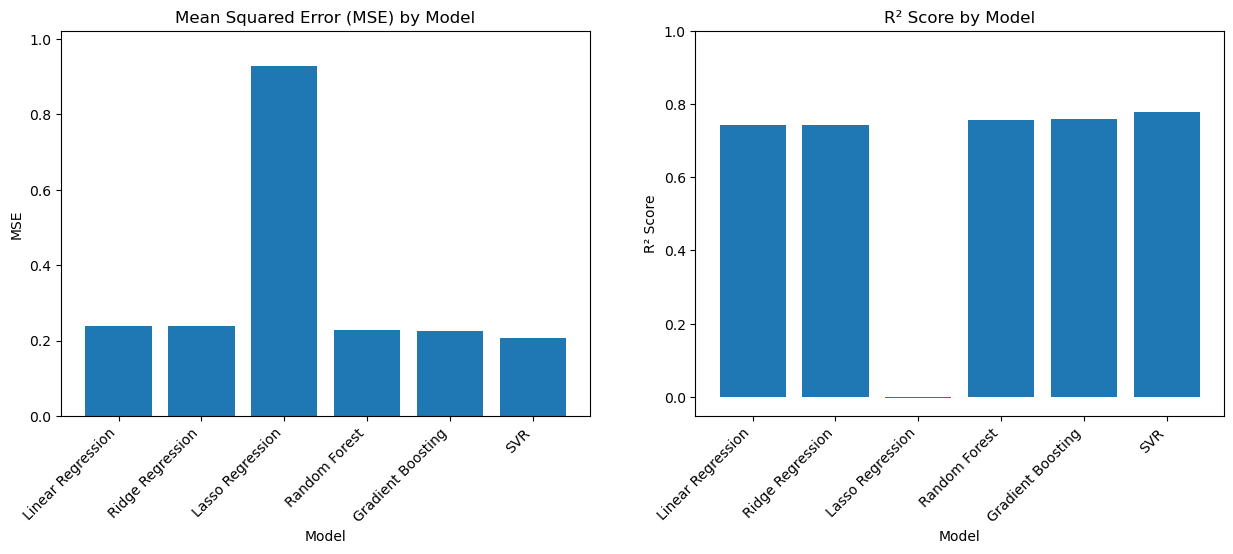

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their performance metrics
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 'SVR']
mse_scores = [0.2387, 0.2387, 0.9286, 0.2267, 0.2241, 0.2061]
r2_scores = [0.7423, 0.7424, -0.0022, 0.7553, 0.7581, 0.7776]

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot MSE
bars = ax1.bar(models, mse_scores)
ax1.set_title('Mean Squared Error (MSE) by Model')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Model')
ax1.set_ylim(0, max(mse_scores) * 1.1)  # Adjust y-axis limit for better visibility

# Angle the x-axis labels for MSE plot
ax1.set_xticklabels(models, rotation=45, ha='right')

# Plot R² Score
bars = ax2.bar(models, r2_scores)
ax2.set_title('R² Score by Model')
ax2.set_ylabel('R² Score')
ax2.set_xlabel('Model')
ax2.set_ylim(min(r2_scores) - 0.05, 1)  # Adjust y-axis limit for better visibility

# Angle the x-axis labels for R² Score plot
ax2.set_xticklabels(models, rotation=45, ha='right')
             

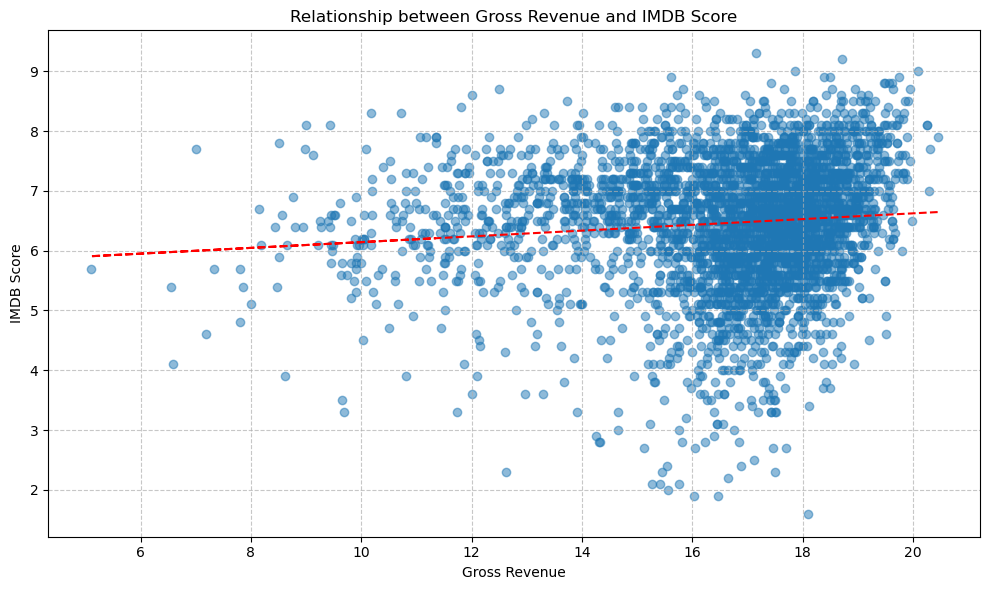

In [54]:
# Filter out rows where gross is null or zero to avoid log issues
filtered_df = imdb_df_clean[imdb_df_clean['gross'] > 0]

# Log transform gross for better visualization of the relationship
filtered_df['gross_rev'] = np.log1p(filtered_df['gross'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['gross_rev'], filtered_df['imdb_score'], alpha=0.5)

# Add labels and title
plt.xlabel('Gross Revenue')
plt.ylabel('IMDB Score')
plt.title('Relationship between Gross Revenue and IMDB Score')

# Add a trend line
z = np.polyfit(filtered_df['gross_rev'], filtered_df['imdb_score'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['gross_rev'], p(filtered_df['gross_rev']), "r--")

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

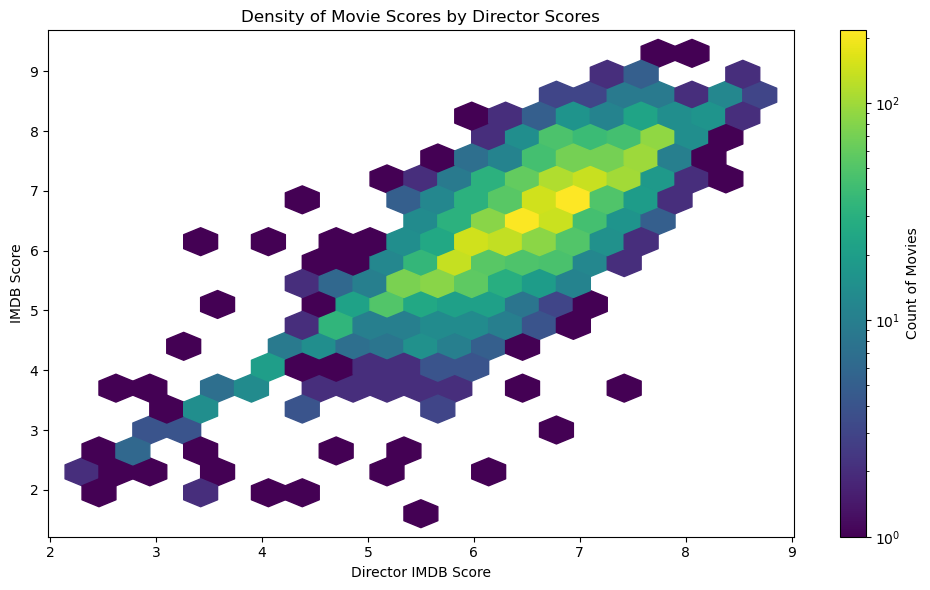

In [55]:

plt.figure(figsize=(10, 6))

# Create the hexbin plot
hb = plt.hexbin(imdb_df_clean['director_name'], imdb_df_clean['imdb_score'], 
                gridsize=20, cmap='viridis', bins='log')

# Add labels and title
plt.xlabel('Director IMDB Score')
plt.ylabel('IMDB Score')
plt.title('Density of Movie Scores by Director Scores')

# Add a color bar
plt.colorbar(hb, label='Count of Movies')

# Show the plot
plt.tight_layout()
plt.show()

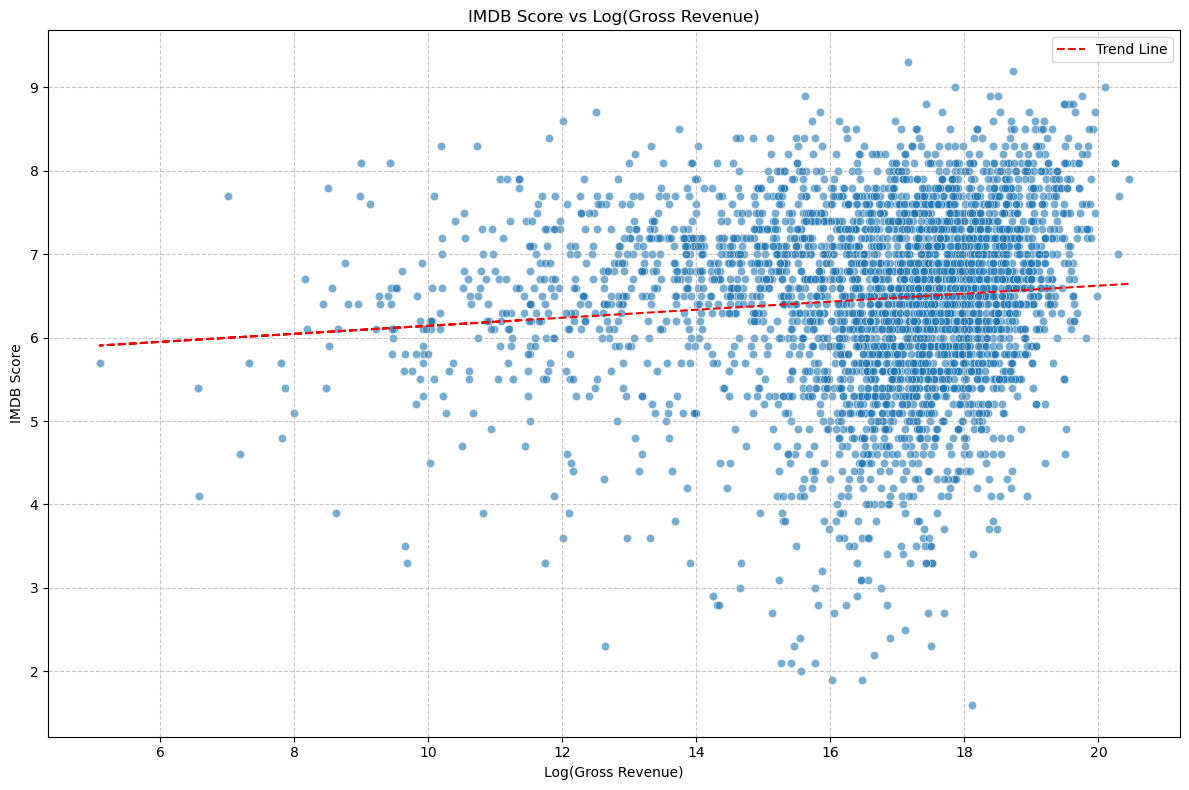

In [56]:
import seaborn as sns

# Assuming your DataFrame is named imdb_df_clean
# Filter out movies with zero or null gross to avoid issues with log transformation
filtered_df = imdb_df_clean[imdb_df_clean['gross'] > 0]

# Log transform gross for better visualization
filtered_df['gross_rev'] = np.log1p(filtered_df['gross'])

plt.figure(figsize=(12, 8))

# Create the scatter plot using seaborn for enhanced aesthetics
sns.scatterplot(x='gross_rev', y='imdb_score', data=filtered_df, alpha=0.6)

# Add labels and title
plt.xlabel('Log(Gross Revenue)')
plt.ylabel('IMDB Score')
plt.title('IMDB Score vs Log(Gross Revenue)')

# Add a trend line
z = np.polyfit(filtered_df['gross_rev'], filtered_df['imdb_score'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['gross_rev'], p(filtered_df['gross_rev']), "r--", label='Trend Line')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()